This notebook renders a set of rotationally-driven, rounded squares using the Discrete Element Method (DEM) component of [hoomd-blue](https://glotzerlab.engin.umich.edu/hoomd-blue/). Particles are colored according to the orientation of their hexatic order parameter $\psi_6$ by [freud](https://glotzerlab.engin.umich.edu/freud/), showing the hexagonally-ordered domains of the crystal.

In [1]:
import freud
import gtar
import json
import numpy as np

import plato
import plato.draw.matplotlib as draw

In [2]:
with gtar.GTAR('squares.zip', 'r') as traj:
    positions = traj.readPath('position.f32.ind')
    orientations = traj.readPath('orientation.f32.ind')
    box = traj.readPath('box.f32.uni')
    params = json.loads(traj.readPath('props.json'))

rounding_radius = params['radius']
type_shapes = params['shapes']
vertices = type_shapes[0]

In [3]:
hexatic = freud.order.Hexatic(6)
fbox = freud.box.Box(*box, is2D=True)
hexatic.compute((fbox, positions))
psi6 = hexatic.particle_order
angle = np.angle(psi6)

colors = np.ones((positions.shape[0], 4))
colors[:, :3] = plato.cmap.cubeellipse(angle)

<ipython-input-3-84d23bfffb12>:2: UserWarning: Specifying z-dimensions in a 2-dimensional box has no effect!
  fbox = freud.box.Box(*box, is2D=True)


/home/matthew/dev/plato/plato/draw/matplotlib/Scene.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  return figure.savefig(filename, dpi=figure.dpi, bbox_inches='tight',
/home/matthew/env/default_20191211/lib/python3.8/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


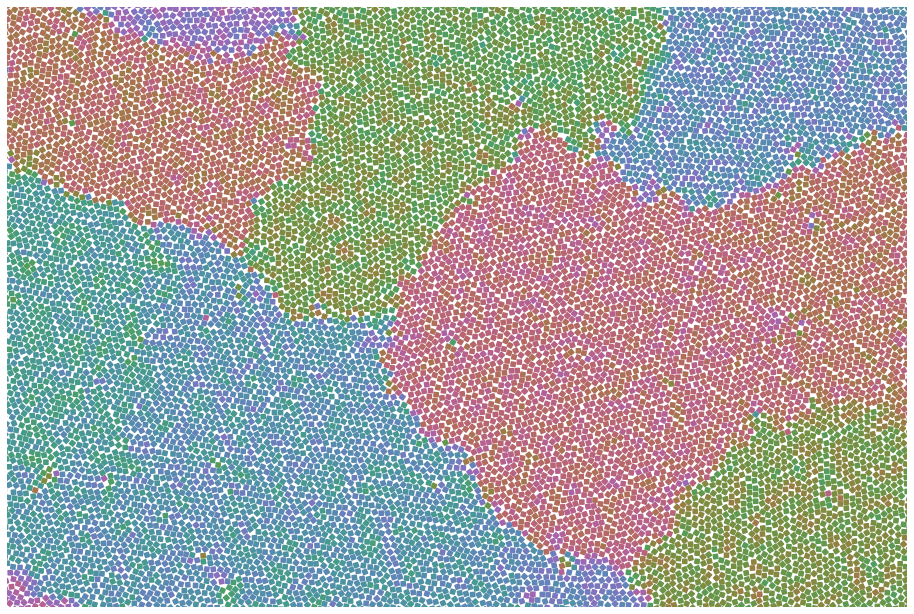

In [4]:
prim = draw.Spheropolygons(positions=positions[:, :2], orientations=orientations, colors=colors,
                          vertices=vertices, radius=rounding_radius)

scene = draw.Scene(prim, size=(1.5*box[0], box[0]), pixel_scale=600/box[0], features=dict(pan=True), zoom=2.8)

target = '../gallery/active_squares_matplotlib.png'
scene.save(target)